## Data preparation and EDA

In this section i clean and prepare the dataset for the model which involves the following steps:

- Download the data from the given link.
- Reformat categorical columns (status, home, marital, records, and job) by mapping with appropriate values.
- Replace the maximum value of income, assests, and debt columns with NaNs.
- Replace the NaNs in the dataframe with 0 (will be shown in the next lesson).
- Extract only those rows in the column status who are either ok or default as value.
- Split the data in a two-step process which finally leads to the distribution of 60% train, 20% validation, and 20% test sets with random seed to 11.
- Prepare target variable status by converting it from categorical to binary, where 0 represents ok and 1 represents default.
- Finally delete the target variable from the train/val/test dataframe.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv("/Users/victoroshimua/Machine-learning-zoomcamp-/DATA/credit_risk.csv")

In [4]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
data.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

In [6]:
data.columns=data.columns.str.lower()

In [7]:
data.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [8]:
data["status"]=data.status.map({1:"ok",2:"default",0:"unk"})
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

data.home = data.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

data.marital = data.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

data.records = data.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

data.job = data.job.map(job_values)


In [10]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [12]:
### according to the data description from where i downloaded it, 999999999 represents a mising value
## To make it show.
for c in ["income","assets","debt"]:
    data[c] = data[c].replace(99999999,np.nan)


In [13]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [14]:
data.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [15]:
data.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [16]:
data=data[data.status != "unk"].reset_index(drop=True)

In [17]:
data.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
data["status"]=(data["status"]=="default").astype(int)
data["status"]

0       0
1       0
2       1
3       0
4       0
       ..
4449    1
4450    0
4451    1
4452    0
4453    0
Name: status, Length: 4454, dtype: int64

In [20]:
data_full_train,data_test = train_test_split(data,test_size=0.2,random_state=11)
data_train,data_val=train_test_split(data_full_train,test_size=0.25,random_state=11)
len(data_train), len(data_val),len(data_test)

(2672, 891, 891)

In [21]:
data_train=data_train.reset_index(drop=True)
data_test=data_test.reset_index(drop=True)
data_val=data_val.reset_index(drop=True)

In [22]:
data_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,0,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,0,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,0,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,0,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,0,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [23]:
Y_train=data_train["status"].values
Y_test=data_test["status"].values
Y_val=data_val["status"].values

In [24]:
Y_train

array([1, 1, 0, ..., 0, 0, 0])

In [25]:
del data_train["status"]
del data_test["status"]
del data_val["status"]

In [26]:
data_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## Decision trees

In [27]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'
# decision trees in without Scikit learn

In [28]:
dt=data_train.iloc[0].to_dict()
assess_risk(dt)

'ok'

In [29]:
for i in range(2672):
    dt = data_train.iloc[i].to_dict()
    risk_level = assess_risk(dt)
    print("Risk level for client", i+1, ":", risk_level)


Risk level for client 1 : ok
Risk level for client 2 : ok
Risk level for client 3 : default
Risk level for client 4 : default
Risk level for client 5 : default
Risk level for client 6 : ok
Risk level for client 7 : default
Risk level for client 8 : default
Risk level for client 9 : default
Risk level for client 10 : default
Risk level for client 11 : ok
Risk level for client 12 : default
Risk level for client 13 : default
Risk level for client 14 : default
Risk level for client 15 : default
Risk level for client 16 : default
Risk level for client 17 : default
Risk level for client 18 : default
Risk level for client 19 : default
Risk level for client 20 : default
Risk level for client 21 : default
Risk level for client 22 : default
Risk level for client 23 : default
Risk level for client 24 : default
Risk level for client 25 : ok
Risk level for client 26 : default
Risk level for client 27 : default
Risk level for client 28 : default
Risk level for client 29 : ok
Risk level for client 30

Risk level for client 349 : default
Risk level for client 350 : default
Risk level for client 351 : default
Risk level for client 352 : ok
Risk level for client 353 : default
Risk level for client 354 : default
Risk level for client 355 : default
Risk level for client 356 : ok
Risk level for client 357 : ok
Risk level for client 358 : default
Risk level for client 359 : ok
Risk level for client 360 : ok
Risk level for client 361 : ok
Risk level for client 362 : ok
Risk level for client 363 : ok
Risk level for client 364 : ok
Risk level for client 365 : default
Risk level for client 366 : default
Risk level for client 367 : ok
Risk level for client 368 : default
Risk level for client 369 : default
Risk level for client 370 : default
Risk level for client 371 : default
Risk level for client 372 : default
Risk level for client 373 : default
Risk level for client 374 : default
Risk level for client 375 : default
Risk level for client 376 : default
Risk level for client 377 : default
Risk l

Risk level for client 745 : default
Risk level for client 746 : ok
Risk level for client 747 : default
Risk level for client 748 : default
Risk level for client 749 : default
Risk level for client 750 : default
Risk level for client 751 : default
Risk level for client 752 : default
Risk level for client 753 : default
Risk level for client 754 : default
Risk level for client 755 : default
Risk level for client 756 : ok
Risk level for client 757 : ok
Risk level for client 758 : ok
Risk level for client 759 : default
Risk level for client 760 : ok
Risk level for client 761 : default
Risk level for client 762 : ok
Risk level for client 763 : default
Risk level for client 764 : default
Risk level for client 765 : default
Risk level for client 766 : default
Risk level for client 767 : default
Risk level for client 768 : ok
Risk level for client 769 : ok
Risk level for client 770 : default
Risk level for client 771 : ok
Risk level for client 772 : default
Risk level for client 773 : default
R

Risk level for client 1122 : default
Risk level for client 1123 : default
Risk level for client 1124 : ok
Risk level for client 1125 : ok
Risk level for client 1126 : default
Risk level for client 1127 : ok
Risk level for client 1128 : default
Risk level for client 1129 : default
Risk level for client 1130 : default
Risk level for client 1131 : ok
Risk level for client 1132 : default
Risk level for client 1133 : default
Risk level for client 1134 : ok
Risk level for client 1135 : default
Risk level for client 1136 : ok
Risk level for client 1137 : default
Risk level for client 1138 : ok
Risk level for client 1139 : ok
Risk level for client 1140 : default
Risk level for client 1141 : default
Risk level for client 1142 : default
Risk level for client 1143 : ok
Risk level for client 1144 : default
Risk level for client 1145 : default
Risk level for client 1146 : default
Risk level for client 1147 : default
Risk level for client 1148 : default
Risk level for client 1149 : default
Risk leve

Risk level for client 1444 : default
Risk level for client 1445 : ok
Risk level for client 1446 : ok
Risk level for client 1447 : default
Risk level for client 1448 : ok
Risk level for client 1449 : default
Risk level for client 1450 : ok
Risk level for client 1451 : ok
Risk level for client 1452 : default
Risk level for client 1453 : ok
Risk level for client 1454 : ok
Risk level for client 1455 : default
Risk level for client 1456 : default
Risk level for client 1457 : default
Risk level for client 1458 : default
Risk level for client 1459 : ok
Risk level for client 1460 : default
Risk level for client 1461 : default
Risk level for client 1462 : ok
Risk level for client 1463 : default
Risk level for client 1464 : default
Risk level for client 1465 : ok
Risk level for client 1466 : ok
Risk level for client 1467 : ok
Risk level for client 1468 : default
Risk level for client 1469 : ok
Risk level for client 1470 : ok
Risk level for client 1471 : default
Risk level for client 1472 : ok
Ri

Risk level for client 1825 : default
Risk level for client 1826 : default
Risk level for client 1827 : ok
Risk level for client 1828 : default
Risk level for client 1829 : default
Risk level for client 1830 : default
Risk level for client 1831 : default
Risk level for client 1832 : default
Risk level for client 1833 : default
Risk level for client 1834 : default
Risk level for client 1835 : ok
Risk level for client 1836 : default
Risk level for client 1837 : default
Risk level for client 1838 : ok
Risk level for client 1839 : default
Risk level for client 1840 : default
Risk level for client 1841 : ok
Risk level for client 1842 : ok
Risk level for client 1843 : default
Risk level for client 1844 : ok
Risk level for client 1845 : default
Risk level for client 1846 : ok
Risk level for client 1847 : default
Risk level for client 1848 : default
Risk level for client 1849 : ok
Risk level for client 1850 : default
Risk level for client 1851 : default
Risk level for client 1852 : default
Risk

Risk level for client 2179 : default
Risk level for client 2180 : default
Risk level for client 2181 : default
Risk level for client 2182 : ok
Risk level for client 2183 : default
Risk level for client 2184 : default
Risk level for client 2185 : default
Risk level for client 2186 : default
Risk level for client 2187 : ok
Risk level for client 2188 : default
Risk level for client 2189 : default
Risk level for client 2190 : default
Risk level for client 2191 : default
Risk level for client 2192 : default
Risk level for client 2193 : default
Risk level for client 2194 : default
Risk level for client 2195 : default
Risk level for client 2196 : ok
Risk level for client 2197 : default
Risk level for client 2198 : default
Risk level for client 2199 : default
Risk level for client 2200 : ok
Risk level for client 2201 : default
Risk level for client 2202 : ok
Risk level for client 2203 : default
Risk level for client 2204 : default
Risk level for client 2205 : default
Risk level for client 2206

Risk level for client 2539 : default
Risk level for client 2540 : default
Risk level for client 2541 : default
Risk level for client 2542 : default
Risk level for client 2543 : default
Risk level for client 2544 : default
Risk level for client 2545 : default
Risk level for client 2546 : ok
Risk level for client 2547 : default
Risk level for client 2548 : ok
Risk level for client 2549 : ok
Risk level for client 2550 : default
Risk level for client 2551 : default
Risk level for client 2552 : default
Risk level for client 2553 : default
Risk level for client 2554 : ok
Risk level for client 2555 : ok
Risk level for client 2556 : default
Risk level for client 2557 : default
Risk level for client 2558 : ok
Risk level for client 2559 : default
Risk level for client 2560 : default
Risk level for client 2561 : ok
Risk level for client 2562 : default
Risk level for client 2563 : ok
Risk level for client 2564 : ok
Risk level for client 2565 : ok
Risk level for client 2566 : default
Risk level for

In [30]:
#decision tree with scikit learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [31]:
train_dicts=data_train.fillna(0).to_dict(orient="records")
dv=DictVectorizer(sparse=False)
dv.fit(train_dicts)
X_train=dv.transform(train_dicts)


In [32]:

dv.get_feature_names()

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [33]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
val_dicts=data_val.fillna(0).to_dict(orient="records")
X_val=dv.transform(val_dicts)

In [35]:
y_pred=dt.predict_proba(X_val)[:,1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0.

In [36]:
roc_auc_score(Y_val,y_pred)
#low score here 

0.6562537841176043

In [37]:
## checking for roc_auc_score of the train data
pred_1= dt.predict_proba(X_train)[:,1]
roc_auc_score(Y_train,pred_1)

1.0

## The model did learn well on the train data but failed to predict well on unseen data this is (OVERFITTING)

In [38]:
## To solve overfiting in decision trees, i have to change the number of trees or train a decision stump

In [39]:
dtm=DecisionTreeClassifier(max_depth=3)
dtm.fit(X_train,Y_train)
y_pred=dtm.predict_proba(X_val)[:,1]
y_pred

array([0.11690761, 0.11690761, 0.26356589, 0.11690761, 0.11690761,
       0.3875969 , 0.11690761, 0.76811594, 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.11690761, 0.11690761, 0.26356589,
       0.60294118, 0.11690761, 0.60829493, 0.11690761, 0.11690761,
       0.11690761, 0.3875969 , 0.11690761, 0.3875969 , 0.60829493,
       0.48387097, 0.60829493, 0.11690761, 0.60829493, 0.11690761,
       0.48387097, 0.11690761, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.76811594, 0.60829493, 0.60829493, 0.76811594,
       0.11690761, 0.76811594, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.76811594, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.11690761, 0.11690761, 0.3875969 ,
       0.11690761, 0.11690761, 0.3875969 , 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.26356589, 0.26356589, 0.11690761,
       0.3875969 , 0.26356589, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.11690761, 0.11690761, 0.11690

In [40]:
roc_auc_score(Y_val,y_pred)

0.7389079944782155

In [41]:
pred_1= dtm.predict_proba(X_train)[:,1]
roc_auc_score(Y_train,pred_1)

0.7761016984958594

In [42]:
### here the model is better and does not over fit after changing the number of dept

In [43]:
print(export_text(dt, feature_names=dv.get_feature_names()))
### Decision trees with plenty layers

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- home=parents <= 0.50
|   |   |   |   |   |   |   |--- seniority <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- seniority >  0.50
|   |   |   |   |   |   |   |   |--- price <= 1457.50
|   |   |   |   |   |   |   |   |   |--- expenses <= 55.00
|   |   |   |   |   |   |   |   |   |   |--- home=other <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- home=other >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- expenses >  55.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- price >  1457.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- h

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
##decision tree with only three layers
print(export_text(dtm, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



### Decision trees parameter tuning

* selecting max_depth = numbers of rules 
* selecting min_samples_leaf = numbers of samples in each leaf nodes
###### These are the two best parameters for a Decision tree 

###### selecting max_depth that brings higher accuracy

In [45]:
for d in [1,2,3,4,5,6,7,10,15,20,None,100]:# setting figures for max_depth(none means any of number dept)
    dtc=DecisionTreeClassifier(max_depth=d)
    dtc.fit(X_train,Y_train)
    
    y_pred=dtc.predict_proba(X_val)[:,1]
    auc=roc_auc_score(Y_val,y_pred)
    
    print("For Max_dept {d}, auc_score = {a}".format(d=d,a=auc) )


For Max_dept 1, auc_score = 0.6058644740984719
For Max_dept 2, auc_score = 0.6685264343319367
For Max_dept 3, auc_score = 0.7389079944782155
For Max_dept 4, auc_score = 0.7612827250490422
For Max_dept 5, auc_score = 0.7669377103969388
For Max_dept 6, auc_score = 0.7562392531060037
For Max_dept 7, auc_score = 0.7476810927320724
For Max_dept 10, auc_score = 0.6844560557990845
For Max_dept 15, auc_score = 0.6543193431982757
For Max_dept 20, auc_score = 0.6569197888159647
For Max_dept None, auc_score = 0.6551488217771427
For Max_dept 100, auc_score = 0.6540438594366811


In [46]:
## from here i can see the best parameter for max_depth is between 4 to 6,but 5 is the highest

###### selecting min_sample_leaf and max_depth that brings higher accuracy

In [47]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, Y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, y_pred)
        
        scores.append((depth, s, auc))

In [48]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910
5,4,500,0.679842
6,4,100,0.755937
7,4,200,0.747260
8,5,1,0.766496
9,5,5,0.768173


In [49]:
### to know the parameter with the higest accuracy using pivot tables
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.747
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

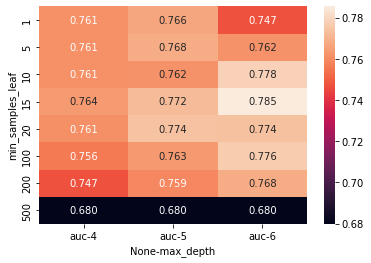

In [50]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [51]:
### from the pivot table it can be seen that the parameters with the highest roc_auc score is max_depth=6 and min_samples_leaf=15

In [52]:
# using the best parameters to tune the model
dt=DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train, Y_train)
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- price <= 925.00
|   |   |   |   |--- amount <= 525.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  525.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- price >  925.00
|   |   |   |   |--- price <= 1382.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- price >  1382.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- assets <= 3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- income <= 132.50
|   |   |   |   |   |--- class: 1
|

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Ensemble and random forest 

In [53]:
from sklearn.ensemble import RandomForestClassifier


In [54]:
rf=RandomForestClassifier(n_estimators=10)

In [55]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [56]:
y_pred=rf.predict_proba(X_val)[:,1]

In [57]:
score=roc_auc_score(Y_val,y_pred)

In [58]:
score

0.7948796347872418

#### Random forest parameter tuning
* max_depth	
* n_estimators
* min_sample_leafs

In [59]:
# using different extimators
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, Y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(Y_val, y_pred)
    
    scores.append((n, auc))

In [60]:
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910
5,4,500,0.679842
6,4,100,0.755937
7,4,200,0.747260
8,5,1,0.766496
9,5,5,0.768173


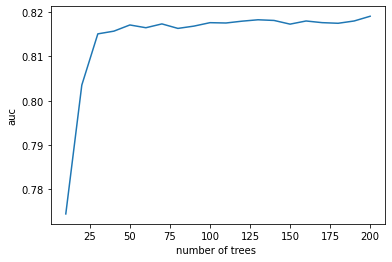

In [61]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("number of trees ")
plt.ylabel("auc")
plt.show()


In [62]:
### using different max depth
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, Y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, y_pred)

        scores.append((d, n, auc))
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


In [63]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878
5,5,60,0.801167
6,5,70,0.802251
7,5,80,0.803244
8,5,90,0.803616
9,5,100,0.804452


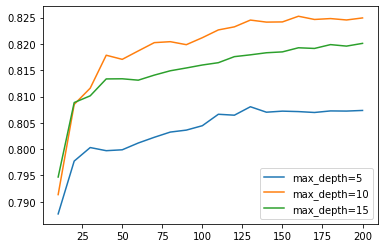

In [64]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [65]:
### best max dept
max_depth=10

In [66]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, Y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, y_pred)

        scores.append((s, n, auc))


In [67]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058
...,...,...,...
95,50,160,0.805929
96,50,170,0.805172
97,50,180,0.805324
98,50,190,0.805596


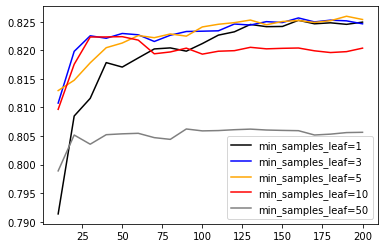

In [68]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [69]:
### best min_samples_leaf
min_samples_leaf = 3


In [70]:
###using the best parameters
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, Y_train)
RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Other useful parametes:
* max_features
* bootstrap
